### Given the unbalance in the dataset, we want to grant 25% of positive labels (non background) / 75% negative

This code helps to understand the returns from a normal dataloader without the balancer and the shape of the returns using the samples. Thanks to this analysis we are able to shape the sampler results to match our needs for training. 

## data_sampler.py

In [1]:
#!/usr/bin/python
# 

import os
from pathlib2 import Path
import torch.nn.functional as F
import torch
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from src.data.rp_dataloader import RegionProposalsDataset
from src.data.data_sampler import BalancedSampler
import torchvision.transforms as transforms
import time
from tqdm import trange, tqdm
from src.models.model import get_model
import wandb
import pickle
import torch.nn as nn
import json
    
# ---------------------------- Dataset ----------------------------- #
# define transforms to resize - warping proposals
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# file obtained through create_crop_dataset.py
path_train = r"/work3/s212725/WasteProject/data/json/train_region_proposals.json"

# dataloader given json file
train_dataset = RegionProposalsDataset(path_train, transform=transform)
print(f"The length of the train dataset is of {len(train_dataset)}")

The length of the train dataset is of 108328


# Balanced Sampler 

In [2]:
import random
import numpy as np
from torch.utils.data.sampler import Sampler

class BalancedSampler(Sampler):
    def __init__(self, data, pos_fraction=0.25, batch_size=32):
        self.data = data
        self.pos_fraction = pos_fraction
        self.batch_size = batch_size
        self.positive_samples_idxs = []
        self.negative_samples_idxs = []
        
        # Split samples into positive and negative 
        for i, (path_to_crop, label) in enumerate(paths_dic.items()):
            if label == 28:
                self.negative_samples_idxs.append(i)
            else:
                self.positive_samples_idxs.append(i)
                
        # Calculate the number of positive and negative samples in each batch
        self.num_pos_per_batch = int(self.pos_fraction * self.batch_size)
        self.num_neg_per_batch = self.batch_size - self.num_pos_per_batch
        
        # Calculate the number of batches needed to include all samples
        self.num_batches = int(np.ceil(len(self.data) / self.batch_size))
        
        # Create a list of batch indices
        self.batch_indices = []
        for i in range(self.num_batches):
            print(f"Processing batch {i}, out of {self.num_batches}")
            # Randomly sample positive indices
            pos_batch_indices = np.random.choice(self.positive_samples_idxs, size=self.num_pos_per_batch, replace=False)
            # Randomly sample negative indices
            neg_batch_indices = np.random.choice(self.negative_samples_idxs, size=self.num_neg_per_batch, replace=False)
            # Concatenate positive and negative indices to form batch
            batch_indices = np.concatenate([pos_batch_indices, neg_batch_indices])
            # Shuffle the batch indices
            np.random.shuffle(batch_indices)
            # Add the batch indices to the list of batch indices
            self.batch_indices.append(batch_indices)
    
    # provides a way to iterate over indices of dataset elements 
    # returns a list of idxs for iters of each batch
    def __iter__(self):
        # Shuffle the list of batch indices
        np.random.shuffle(self.batch_indices)
        # Yield each batch
        for batch_indices in self.batch_indices:
            yield batch_indices.tolist()
            
    def __len__(self):
        # This method returns the number of samples in the dataset so that the data loader
        # knows how many batches it needs to iterate through.
        return len(self.data)


In [3]:
# file obtained through create_crop_dataset.py
path_train = r"/work3/s212725/WasteProject/data/json/train_region_proposals.json"
# dataloader given json file
train_dataset = RegionProposalsDataset(path_train, transform=transform)
paths_dic = train_dataset.paths_to_label
sampler = BalancedSampler(paths_dic)

Processing batch 0, out of 3386
Processing batch 1, out of 3386
Processing batch 2, out of 3386
Processing batch 3, out of 3386
Processing batch 4, out of 3386
Processing batch 5, out of 3386
Processing batch 6, out of 3386
Processing batch 7, out of 3386
Processing batch 8, out of 3386
Processing batch 9, out of 3386
Processing batch 10, out of 3386
Processing batch 11, out of 3386
Processing batch 12, out of 3386
Processing batch 13, out of 3386
Processing batch 14, out of 3386
Processing batch 15, out of 3386
Processing batch 16, out of 3386
Processing batch 17, out of 3386
Processing batch 18, out of 3386
Processing batch 19, out of 3386
Processing batch 20, out of 3386
Processing batch 21, out of 3386
Processing batch 22, out of 3386
Processing batch 23, out of 3386
Processing batch 24, out of 3386
Processing batch 25, out of 3386
Processing batch 26, out of 3386
Processing batch 27, out of 3386
Processing batch 28, out of 3386
Processing batch 29, out of 3386
Processing batch 30,

Processing batch 249, out of 3386
Processing batch 250, out of 3386
Processing batch 251, out of 3386
Processing batch 252, out of 3386
Processing batch 253, out of 3386
Processing batch 254, out of 3386
Processing batch 255, out of 3386
Processing batch 256, out of 3386
Processing batch 257, out of 3386
Processing batch 258, out of 3386
Processing batch 259, out of 3386
Processing batch 260, out of 3386
Processing batch 261, out of 3386
Processing batch 262, out of 3386
Processing batch 263, out of 3386
Processing batch 264, out of 3386
Processing batch 265, out of 3386
Processing batch 266, out of 3386
Processing batch 267, out of 3386
Processing batch 268, out of 3386
Processing batch 269, out of 3386
Processing batch 270, out of 3386
Processing batch 271, out of 3386
Processing batch 272, out of 3386
Processing batch 273, out of 3386
Processing batch 274, out of 3386
Processing batch 275, out of 3386
Processing batch 276, out of 3386
Processing batch 277, out of 3386
Processing bat

Processing batch 498, out of 3386
Processing batch 499, out of 3386
Processing batch 500, out of 3386
Processing batch 501, out of 3386
Processing batch 502, out of 3386
Processing batch 503, out of 3386
Processing batch 504, out of 3386
Processing batch 505, out of 3386
Processing batch 506, out of 3386
Processing batch 507, out of 3386
Processing batch 508, out of 3386
Processing batch 509, out of 3386
Processing batch 510, out of 3386
Processing batch 511, out of 3386
Processing batch 512, out of 3386
Processing batch 513, out of 3386
Processing batch 514, out of 3386
Processing batch 515, out of 3386
Processing batch 516, out of 3386
Processing batch 517, out of 3386
Processing batch 518, out of 3386
Processing batch 519, out of 3386
Processing batch 520, out of 3386
Processing batch 521, out of 3386
Processing batch 522, out of 3386
Processing batch 523, out of 3386
Processing batch 524, out of 3386
Processing batch 525, out of 3386
Processing batch 526, out of 3386
Processing bat

Processing batch 753, out of 3386
Processing batch 754, out of 3386
Processing batch 755, out of 3386
Processing batch 756, out of 3386
Processing batch 757, out of 3386
Processing batch 758, out of 3386
Processing batch 759, out of 3386
Processing batch 760, out of 3386
Processing batch 761, out of 3386
Processing batch 762, out of 3386
Processing batch 763, out of 3386
Processing batch 764, out of 3386
Processing batch 765, out of 3386
Processing batch 766, out of 3386
Processing batch 767, out of 3386
Processing batch 768, out of 3386
Processing batch 769, out of 3386
Processing batch 770, out of 3386
Processing batch 771, out of 3386
Processing batch 772, out of 3386
Processing batch 773, out of 3386
Processing batch 774, out of 3386
Processing batch 775, out of 3386
Processing batch 776, out of 3386
Processing batch 777, out of 3386
Processing batch 778, out of 3386
Processing batch 779, out of 3386
Processing batch 780, out of 3386
Processing batch 781, out of 3386
Processing bat

Processing batch 1066, out of 3386
Processing batch 1067, out of 3386
Processing batch 1068, out of 3386
Processing batch 1069, out of 3386
Processing batch 1070, out of 3386
Processing batch 1071, out of 3386
Processing batch 1072, out of 3386
Processing batch 1073, out of 3386
Processing batch 1074, out of 3386
Processing batch 1075, out of 3386
Processing batch 1076, out of 3386
Processing batch 1077, out of 3386
Processing batch 1078, out of 3386
Processing batch 1079, out of 3386
Processing batch 1080, out of 3386
Processing batch 1081, out of 3386
Processing batch 1082, out of 3386
Processing batch 1083, out of 3386
Processing batch 1084, out of 3386
Processing batch 1085, out of 3386
Processing batch 1086, out of 3386
Processing batch 1087, out of 3386
Processing batch 1088, out of 3386
Processing batch 1089, out of 3386
Processing batch 1090, out of 3386
Processing batch 1091, out of 3386
Processing batch 1092, out of 3386
Processing batch 1093, out of 3386
Processing batch 109

Processing batch 1332, out of 3386
Processing batch 1333, out of 3386
Processing batch 1334, out of 3386
Processing batch 1335, out of 3386
Processing batch 1336, out of 3386
Processing batch 1337, out of 3386
Processing batch 1338, out of 3386
Processing batch 1339, out of 3386
Processing batch 1340, out of 3386
Processing batch 1341, out of 3386
Processing batch 1342, out of 3386
Processing batch 1343, out of 3386
Processing batch 1344, out of 3386
Processing batch 1345, out of 3386
Processing batch 1346, out of 3386
Processing batch 1347, out of 3386
Processing batch 1348, out of 3386
Processing batch 1349, out of 3386
Processing batch 1350, out of 3386
Processing batch 1351, out of 3386
Processing batch 1352, out of 3386
Processing batch 1353, out of 3386
Processing batch 1354, out of 3386
Processing batch 1355, out of 3386
Processing batch 1356, out of 3386
Processing batch 1357, out of 3386
Processing batch 1358, out of 3386
Processing batch 1359, out of 3386
Processing batch 136

Processing batch 1567, out of 3386
Processing batch 1568, out of 3386
Processing batch 1569, out of 3386
Processing batch 1570, out of 3386
Processing batch 1571, out of 3386
Processing batch 1572, out of 3386
Processing batch 1573, out of 3386
Processing batch 1574, out of 3386
Processing batch 1575, out of 3386
Processing batch 1576, out of 3386
Processing batch 1577, out of 3386
Processing batch 1578, out of 3386
Processing batch 1579, out of 3386
Processing batch 1580, out of 3386
Processing batch 1581, out of 3386
Processing batch 1582, out of 3386
Processing batch 1583, out of 3386
Processing batch 1584, out of 3386
Processing batch 1585, out of 3386
Processing batch 1586, out of 3386
Processing batch 1587, out of 3386
Processing batch 1588, out of 3386
Processing batch 1589, out of 3386
Processing batch 1590, out of 3386
Processing batch 1591, out of 3386
Processing batch 1592, out of 3386
Processing batch 1593, out of 3386
Processing batch 1594, out of 3386
Processing batch 159

Processing batch 1925, out of 3386
Processing batch 1926, out of 3386
Processing batch 1927, out of 3386
Processing batch 1928, out of 3386
Processing batch 1929, out of 3386
Processing batch 1930, out of 3386
Processing batch 1931, out of 3386
Processing batch 1932, out of 3386
Processing batch 1933, out of 3386
Processing batch 1934, out of 3386
Processing batch 1935, out of 3386
Processing batch 1936, out of 3386
Processing batch 1937, out of 3386
Processing batch 1938, out of 3386
Processing batch 1939, out of 3386
Processing batch 1940, out of 3386
Processing batch 1941, out of 3386
Processing batch 1942, out of 3386
Processing batch 1943, out of 3386
Processing batch 1944, out of 3386
Processing batch 1945, out of 3386
Processing batch 1946, out of 3386
Processing batch 1947, out of 3386
Processing batch 1948, out of 3386
Processing batch 1949, out of 3386
Processing batch 1950, out of 3386
Processing batch 1951, out of 3386
Processing batch 1952, out of 3386
Processing batch 195

Processing batch 2254, out of 3386
Processing batch 2255, out of 3386
Processing batch 2256, out of 3386
Processing batch 2257, out of 3386
Processing batch 2258, out of 3386
Processing batch 2259, out of 3386
Processing batch 2260, out of 3386
Processing batch 2261, out of 3386
Processing batch 2262, out of 3386
Processing batch 2263, out of 3386
Processing batch 2264, out of 3386
Processing batch 2265, out of 3386
Processing batch 2266, out of 3386
Processing batch 2267, out of 3386
Processing batch 2268, out of 3386
Processing batch 2269, out of 3386
Processing batch 2270, out of 3386
Processing batch 2271, out of 3386
Processing batch 2272, out of 3386
Processing batch 2273, out of 3386
Processing batch 2274, out of 3386
Processing batch 2275, out of 3386
Processing batch 2276, out of 3386
Processing batch 2277, out of 3386
Processing batch 2278, out of 3386
Processing batch 2279, out of 3386
Processing batch 2280, out of 3386
Processing batch 2281, out of 3386
Processing batch 228

Processing batch 2515, out of 3386
Processing batch 2516, out of 3386
Processing batch 2517, out of 3386
Processing batch 2518, out of 3386
Processing batch 2519, out of 3386
Processing batch 2520, out of 3386
Processing batch 2521, out of 3386
Processing batch 2522, out of 3386
Processing batch 2523, out of 3386
Processing batch 2524, out of 3386
Processing batch 2525, out of 3386
Processing batch 2526, out of 3386
Processing batch 2527, out of 3386
Processing batch 2528, out of 3386
Processing batch 2529, out of 3386
Processing batch 2530, out of 3386
Processing batch 2531, out of 3386
Processing batch 2532, out of 3386
Processing batch 2533, out of 3386
Processing batch 2534, out of 3386
Processing batch 2535, out of 3386
Processing batch 2536, out of 3386
Processing batch 2537, out of 3386
Processing batch 2538, out of 3386
Processing batch 2539, out of 3386
Processing batch 2540, out of 3386
Processing batch 2541, out of 3386
Processing batch 2542, out of 3386
Processing batch 254

Processing batch 2788, out of 3386
Processing batch 2789, out of 3386
Processing batch 2790, out of 3386
Processing batch 2791, out of 3386
Processing batch 2792, out of 3386
Processing batch 2793, out of 3386
Processing batch 2794, out of 3386
Processing batch 2795, out of 3386
Processing batch 2796, out of 3386
Processing batch 2797, out of 3386
Processing batch 2798, out of 3386
Processing batch 2799, out of 3386
Processing batch 2800, out of 3386
Processing batch 2801, out of 3386
Processing batch 2802, out of 3386
Processing batch 2803, out of 3386
Processing batch 2804, out of 3386
Processing batch 2805, out of 3386
Processing batch 2806, out of 3386
Processing batch 2807, out of 3386
Processing batch 2808, out of 3386
Processing batch 2809, out of 3386
Processing batch 2810, out of 3386
Processing batch 2811, out of 3386
Processing batch 2812, out of 3386
Processing batch 2813, out of 3386
Processing batch 2814, out of 3386
Processing batch 2815, out of 3386
Processing batch 281

Processing batch 3175, out of 3386
Processing batch 3176, out of 3386
Processing batch 3177, out of 3386
Processing batch 3178, out of 3386
Processing batch 3179, out of 3386
Processing batch 3180, out of 3386
Processing batch 3181, out of 3386
Processing batch 3182, out of 3386
Processing batch 3183, out of 3386
Processing batch 3184, out of 3386
Processing batch 3185, out of 3386
Processing batch 3186, out of 3386
Processing batch 3187, out of 3386
Processing batch 3188, out of 3386
Processing batch 3189, out of 3386
Processing batch 3190, out of 3386
Processing batch 3191, out of 3386
Processing batch 3192, out of 3386
Processing batch 3193, out of 3386
Processing batch 3194, out of 3386
Processing batch 3195, out of 3386
Processing batch 3196, out of 3386
Processing batch 3197, out of 3386
Processing batch 3198, out of 3386
Processing batch 3199, out of 3386
Processing batch 3200, out of 3386
Processing batch 3201, out of 3386
Processing batch 3202, out of 3386
Processing batch 320

In [4]:
print(len(sampler))

108328


# Train Loader using balanced sampler

In [6]:
train_loader = DataLoader(train_dataset, batch_size=1, sampler=sampler, num_workers=4)

In [7]:
print(len(train_loader))

108328


In [28]:
for batch_idx, (images, labels, paths) in enumerate(train_loader):
    break

## Labels analysis

In [9]:
print(labels)

[tensor([27]), tensor([28]), tensor([28]), tensor([28]), tensor([8]), tensor([28]), tensor([28]), tensor([28]), tensor([28]), tensor([28]), tensor([28]), tensor([15]), tensor([28]), tensor([28]), tensor([28]), tensor([28]), tensor([28]), tensor([28]), tensor([28]), tensor([28]), tensor([27]), tensor([28]), tensor([4]), tensor([28]), tensor([28]), tensor([28]), tensor([3]), tensor([26]), tensor([28]), tensor([25]), tensor([28]), tensor([28])]


In [12]:
print(torch.stack(labels).shape)

torch.Size([32, 1])


In [11]:
print(torch.stack(labels))

tensor([[27],
        [28],
        [28],
        [28],
        [ 8],
        [28],
        [28],
        [28],
        [28],
        [28],
        [28],
        [15],
        [28],
        [28],
        [28],
        [28],
        [28],
        [28],
        [28],
        [28],
        [27],
        [28],
        [ 4],
        [28],
        [28],
        [28],
        [ 3],
        [26],
        [28],
        [25],
        [28],
        [28]])


In [ ]:
print(torch.stack(labels).squeeze())

## Images analysis
Seems to include 32 arrays of single images of three channels and 224x224 contained in torch vectors.

In [14]:
print(torch.stack(images).shape)

torch.Size([32, 1, 3, 224, 224])


In [15]:
print(torch.stack(images))

tensor([[[[[0.2706, 0.2706, 0.2706,  ..., 0.2588, 0.2588, 0.2588],
           [0.2706, 0.2706, 0.2706,  ..., 0.2588, 0.2588, 0.2588],
           [0.2706, 0.2706, 0.2706,  ..., 0.2588, 0.2588, 0.2588],
           ...,
           [0.3412, 0.3412, 0.3490,  ..., 0.4000, 0.3804, 0.3804],
           [0.3373, 0.3373, 0.3451,  ..., 0.3961, 0.3765, 0.3765],
           [0.3373, 0.3373, 0.3451,  ..., 0.3961, 0.3765, 0.3765]],

          [[0.2902, 0.2902, 0.2902,  ..., 0.2549, 0.2510, 0.2510],
           [0.2902, 0.2902, 0.2902,  ..., 0.2549, 0.2510, 0.2510],
           [0.2902, 0.2902, 0.2902,  ..., 0.2549, 0.2510, 0.2510],
           ...,
           [0.3333, 0.3333, 0.3412,  ..., 0.3765, 0.3569, 0.3569],
           [0.3294, 0.3294, 0.3373,  ..., 0.3725, 0.3529, 0.3529],
           [0.3294, 0.3294, 0.3373,  ..., 0.3725, 0.3529, 0.3529]],

          [[0.3020, 0.3020, 0.3020,  ..., 0.2745, 0.2706, 0.2706],
           [0.3020, 0.3020, 0.3020,  ..., 0.2745, 0.2706, 0.2706],
           [0.3020, 0.3020

In [ ]:
torch.stack(images).squeeze(dim=1) # solution to match expected form

In [30]:
images[0]

tensor([[[[0.4275, 0.4275, 0.4275,  ..., 0.4706, 0.4706, 0.4706],
          [0.4275, 0.4275, 0.4275,  ..., 0.4706, 0.4706, 0.4706],
          [0.4314, 0.4314, 0.4314,  ..., 0.4706, 0.4706, 0.4706],
          ...,
          [0.4824, 0.4824, 0.4824,  ..., 0.4392, 0.4392, 0.4392],
          [0.4902, 0.4902, 0.4902,  ..., 0.4353, 0.4353, 0.4353],
          [0.4902, 0.4902, 0.4902,  ..., 0.4353, 0.4353, 0.4353]],

         [[0.4000, 0.4000, 0.4000,  ..., 0.4039, 0.4039, 0.4039],
          [0.4000, 0.4000, 0.4000,  ..., 0.4039, 0.4039, 0.4039],
          [0.4039, 0.4039, 0.4039,  ..., 0.4039, 0.4039, 0.4039],
          ...,
          [0.4353, 0.4353, 0.4353,  ..., 0.4078, 0.4078, 0.4078],
          [0.4431, 0.4431, 0.4431,  ..., 0.4039, 0.4039, 0.4039],
          [0.4431, 0.4431, 0.4431,  ..., 0.4039, 0.4039, 0.4039]],

         [[0.3294, 0.3294, 0.3294,  ..., 0.2941, 0.2941, 0.2941],
          [0.3294, 0.3294, 0.3294,  ..., 0.2941, 0.2941, 0.2941],
          [0.3333, 0.3333, 0.3333,  ..., 0

(224, 224, 3)


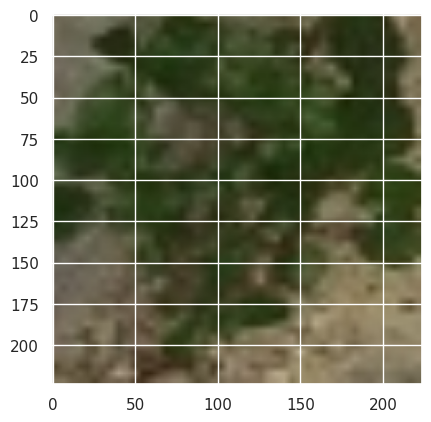

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Assuming images[0] is a tensor with shape torch.Size([1, 3, 224, 224])
image = images[0].squeeze()
image = image.permute(1, 2, 0) # change tensor shape from (1, 3, 224, 224) to (224, 224, 3)
image = np.array(image) # convert tensor to numpy array
print(image.shape)
plt.imshow(image)
plt.show()

In [31]:
images = torch.stack(images)

In [27]:
print(images[0].shape)

torch.Size([1, 3, 224, 224])


## Paths Analysis
To fix the differences we would need to convert the list of tuples to a list of strings, you can use a list comprehension to extract the first element of each tuple, and then use the join method to combine all the strings into one long string. 


**NOTE: It is not necessary since paths will not be used in the training**

In [39]:
paths

[('/work3/s212725/WasteProject/data/crops/batch_4/000097_94.jpg',),
 ('/work3/s212725/WasteProject/data/crops/batch_4/000049_57.jpg',),
 ('/work3/s212725/WasteProject/data/crops/batch_12/000001_99.jpg',),
 ('/work3/s212725/WasteProject/data/crops/batch_10/000052_30.jpg',),
 ('/work3/s212725/WasteProject/data/crops/batch_12/000058_gt5.jpg',),
 ('/work3/s212725/WasteProject/data/crops/batch_3/IMG_5039_69.jpg',),
 ('/work3/s212725/WasteProject/data/crops/batch_13/000060_96.jpg',),
 ('/work3/s212725/WasteProject/data/crops/batch_6/000088_51.jpg',),
 ('/work3/s212725/WasteProject/data/crops/batch_9/000042_66.jpg',),
 ('/work3/s212725/WasteProject/data/crops/batch_1/000118_8.jpg',),
 ('/work3/s212725/WasteProject/data/crops/batch_3/IMG_5039_gt1.jpg',),
 ('/work3/s212725/WasteProject/data/crops/batch_5/000076_12.jpg',),
 ('/work3/s212725/WasteProject/data/crops/batch_4/000066_9.jpg',),
 ('/work3/s212725/WasteProject/data/crops/batch_8/000059_19.jpg',),
 ('/work3/s212725/WasteProject/data/crop

In [51]:
print(len(paths))

32


# Train Loader without using it

In [4]:
train_loader = DataLoader(train_dataset, batch_size=32, num_workers=4)

In [5]:
print(len(train_loader))

3386


In [6]:
for batch_idx, (images, labels, paths) in enumerate(train_loader):
    break

## Labels analysis

In [7]:
print(len(labels))

32


In [9]:
print(labels)

tensor([ 6, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
        28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28])


In [10]:
labels.shape

torch.Size([32])

## Images analysis

In [17]:
images

[tensor([[[[0.5647, 0.5647, 0.5647,  ..., 0.7412, 0.7412, 0.7412],
           [0.5647, 0.5647, 0.5647,  ..., 0.7412, 0.7412, 0.7412],
           [0.5647, 0.5647, 0.5647,  ..., 0.7412, 0.7412, 0.7412],
           ...,
           [0.5098, 0.5098, 0.5098,  ..., 0.5373, 0.5373, 0.5373],
           [0.5098, 0.5098, 0.5098,  ..., 0.5373, 0.5373, 0.5373],
           [0.5098, 0.5098, 0.5098,  ..., 0.5373, 0.5373, 0.5373]],
 
          [[0.5255, 0.5255, 0.5255,  ..., 0.6902, 0.6902, 0.6902],
           [0.5255, 0.5255, 0.5255,  ..., 0.6902, 0.6902, 0.6902],
           [0.5255, 0.5255, 0.5255,  ..., 0.6902, 0.6902, 0.6902],
           ...,
           [0.7137, 0.7137, 0.7137,  ..., 0.5804, 0.5804, 0.5804],
           [0.7137, 0.7137, 0.7137,  ..., 0.5804, 0.5804, 0.5804],
           [0.7137, 0.7137, 0.7137,  ..., 0.5804, 0.5804, 0.5804]],
 
          [[0.5176, 0.5176, 0.5176,  ..., 0.6667, 0.6667, 0.6667],
           [0.5176, 0.5176, 0.5176,  ..., 0.6667, 0.6667, 0.6667],
           [0.5176, 0.51

In [14]:
print(images.shape)

torch.Size([32, 3, 224, 224])


## Paths Analysis

In [15]:
paths

('/work3/s212725/WasteProject/data/crops/batch_12/000076_gt0.jpg',
 '/work3/s212725/WasteProject/data/crops/batch_12/000076_0.jpg',
 '/work3/s212725/WasteProject/data/crops/batch_12/000076_1.jpg',
 '/work3/s212725/WasteProject/data/crops/batch_12/000076_2.jpg',
 '/work3/s212725/WasteProject/data/crops/batch_12/000076_3.jpg',
 '/work3/s212725/WasteProject/data/crops/batch_12/000076_4.jpg',
 '/work3/s212725/WasteProject/data/crops/batch_12/000076_5.jpg',
 '/work3/s212725/WasteProject/data/crops/batch_12/000076_6.jpg',
 '/work3/s212725/WasteProject/data/crops/batch_12/000076_7.jpg',
 '/work3/s212725/WasteProject/data/crops/batch_12/000076_8.jpg',
 '/work3/s212725/WasteProject/data/crops/batch_12/000076_9.jpg',
 '/work3/s212725/WasteProject/data/crops/batch_12/000076_10.jpg',
 '/work3/s212725/WasteProject/data/crops/batch_12/000076_11.jpg',
 '/work3/s212725/WasteProject/data/crops/batch_12/000076_12.jpg',
 '/work3/s212725/WasteProject/data/crops/batch_12/000076_13.jpg',
 '/work3/s212725/Wa